In This notebook, we will perform the Regression Analysis of the Movie data.

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('./data/tn_moviesource2.csv', encoding='utf-8', index_col=0)

In [498]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [499]:
colstoclean = ['ProductionBudget', 'Opening WeekendTheaters',
       'MaximumTheaters', 'TheatricalEngagements', 'Opening WeekendRevenue',
       'DomesticBox Office', 'Infl. Adj. Dom.Box Office',
       'InternationalBox Office', 'WorldwideBox Office']
for col in colstoclean:
    movies[col] = movies[col].apply(clean_currency).astype('float')

#Need to merge IMDB movie data with Actor Director influence
#Need to merge Bass Model Coeffiecients with Movie data
#Need to merge with IMDB movie data including actors and directors 

## Merge IMDB movie data with Actor/Director influence

In [16]:
titleswprins_df = pd.read_csv('./data/titleswprins.csv', encoding='utf-8',index_col=0 )

In [32]:
act_actress_df = titleswprins_df[(titleswprins_df.category=='actor')  |  (titleswprins_df.category=='actress')]

In [33]:
director_df = titleswprins_df[(titleswprins_df.category=='director')]

In [35]:
director_df.Released.value_counts()

2015    326
2016    284
2011    282
2013    264
2012    258
2017    254
2014    251
2010    246
2018    217
2019    211
2020     80
2021     34
Name: Released, dtype: int64

In [68]:
bigact_wicar_df = pd.read_csv('./data/bigactor_wicar.csv', encoding='utf-8',index_col=0 )

In [41]:
bigdir_wicar_df = pd.read_csv('./data/bigdir_wicar_df.csv', encoding='utf-8',index_col=0 )

In [707]:
bigdir_wicar_df[bigdir_wicar_df.director == 'Steven Spielberg']

,index,mid,title,released,director,boxoffice,inf_adj_boxoffice,cr,wicar
19879,1777,tt0082971,Raiders of the Lost Ark,06-12-1981,Steven Spielberg,"$248,159,971",4.576070e+08,0,0.000000e+00
19880,280,tt0083866,E.T. the Extra-Terrestrial,06-11-1982,Steven Spielberg,"$435,110,554",7.931630e+08,248159971,4.162135e+02
19881,2894,tt0087469,Indiana Jones and the Temple of Doom,05-23-1984,Steven Spielberg,"$179,870,271",3.202950e+08,683270525,1.472279e+03
19882,2647,tt0088939,The Color Purple,02-07-1986,Steven Spielberg,"$98,467,863",1.711864e+08,863140796,1.213343e+03
19883,1522,tt0092965,Empire of the Sun,12-25-1987,Steven Spielberg,"$22,238,696",3.819274e+07,961608659,9.264151e+02
19884,201,tt0097576,Indiana Jones and the Last Crusade,05-24-1989,Steven Spielberg,"$197,171,806",3.303022e+08,983847355,4.218214e+02
19885,2350,tt0096794,Always,12-22-1989,Steven Spielberg,"$43,858,790",7.347225e+07,1181019161,3.647954e+03
19886,897,tt0102057,Hook,12-11-1991,Steven Spielberg,"$119,654,823",1.953963e+08,1224877951,1.656098e+03
19887,1631,tt0107290,Jurassic Park,06-11-1993,Steven Spielberg,"$404,214,720",6.430248e+08,1344532774,8.988044e+03
19888,1865,tt0108052,Schindler's List,02-04-1994,Steven Spielberg,"$96,898,818",1.521021e+08,1748747494,4.225527e+04


In [581]:
bigdir_wicar_df[bigdir_wicar_df.title == 'Jack and Jill']

,mid,title,released,director,boxoffice,inf_adj_boxoffice,cr,wicar
189,tt0810913,Jack and Jill,11-11-2011,Dennis Dugan,"$74,158,157",89805528.13,834518970,3685661.525


In [709]:
lookup_dir_inf('tt1677720')

39212066.1

In [708]:
bigdir_wicar_df.loc[bigdir_wicar_df.mid == 'tt1677720']['wicar'].nlargest(1).sum()

39212066.1

In [579]:
#lookup tconst in director_df lookup tconst=mid in bigdirec_wicar
#return direc influence
def lookup_dir_inf(x):
    inf_rat = 0
    try:
        inf_rat = bigdir_wicar_df.loc[bigdir_wicar_df.mid == x]['wicar']
        return inf_rat.nlargest(1).sum()
    except:
        return 0
    

In [580]:
#lookup tconst in director_df lookup tconst=mid in bigdirec_wicar
#return top two actor influence
def lookup_act_inf(movieid):
    inf_rat = 0
    try:
        inf_rat = bigact_wicar_df.loc[bigact_wicar_df.tconst == movieid]['wicar']
        return inf_rat.nlargest(2).sum()
    except:
         return 0
   

In [727]:
#Test Lookup dir Influence
def test_lookup_dir_infl(mid,answer):
    inf = lookup_dir_inf(mid)
    if(inf == answer):
        return True
    else:
        print('Inf', inf, 'answer',answer)
        return False
    
#Test Lookup actor Influence
def test_lookup_actor_infl(mid, answer):
    inf = lookup_act_inf('mid')
    if(inf == answer):
        return True
    else:
        print('Inf', inf, 'answer',answer)
        return False
    

#### Lookup Act Influence

In [747]:
#Actor Infl
#lookup actor influence for each movie in act_actress_df
infl = []
for mid in act_actress_df['tconst']:
    rat = lookup_act_inf(mid)
    infl.append(rat)
act_actress_df['act_infl']  = infl

<ipython-input-747-a58871750136>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_actress_df['act_infl']  = infl


#### Lookup Director Influence

In [740]:
#Director infl
infl = []
for mid in director_df['tconst']:
    rat = lookup_dir_inf(mid)
    infl.append(rat)
director_df['dir_infl'] = infl

<ipython-input-740-f5f87b8e919e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_df['dir_infl'] = infl


#### Lookup tconst 

In [664]:
#lookup moviesname in titles with prins(acts and dirs) return tconst/movieid
#return
def lookup_movie_tconst(moviename):
    mid = ''
    try:
        mid = titleswprins_df.loc[titleswprins_df.Title == moviename]['tconst'].iloc[0]
    except IndexError:
        mid = 'N/A'
    return mid

Lookup all Titles for the IMDB tcosnt to merge on later.

In [458]:
movies_clean.drop_duplicates(ignore_index=True,subset=['Title'])

,Released,ReleasedWorldwide,Title,TheatricalDistributor,Genre,Source,ProductionMethod,CreativeType,ProductionBudget,Opening WeekendTheaters,MaximumTheaters,TheatricalEngagements,Opening WeekendRevenue,DomesticBox Office,Infl. Adj. Dom.Box Office,InternationalBox Office,WorldwideBox Office,tconst,Released_dt,year
0,"Jun 21, 2019","Jun 20, 2019",Toy Story 4,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000.0,4575.0,4575.0,38194.0,120908065.0,434038008.0,434038008.0,639042321.0,1.073080e+09,tt1979376,2019-06-21,2019.0
1,"Jun 18, 2010","Jun 18, 2010",Toy Story 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000.0,4028.0,4028.0,33699.0,110307189.0,415004880.0,481805411.0,653874642.0,1.068880e+09,tt0435761,2010-06-18,2010.0
2,"Jun 21, 2013","Jun 21, 2013",Monsters University,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000.0,4004.0,4004.0,24656.0,82429469.0,268488329.0,302503449.0,474967481.0,7.434558e+08,tt1453405,2013-06-21,2013.0
3,"Jun 24, 2011","Jun 23, 2011",Cars 2,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000.0,4115.0,4115.0,25790.0,66135507.0,191450875.0,221146280.0,368704508.0,5.601554e+08,tt1216475,2011-06-24,2011.0
4,"Jun 16, 2017","Jun 16, 2017",Cars 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,175000000.0,4256.0,4256.0,24083.0,53688680.0,152901115.0,156139821.0,230640254.0,3.835414e+08,tt3606752,2017-06-16,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,"Oct 25, 2013","Oct 25, 2013",The Counselor,20th Century Fox,Thriller/Suspense,Original Screenplay,Live Action,Contemporary Fiction,25000000.0,3044.0,3044.0,8015.0,7842930.0,16973715.0,19124056.0,54035619.0,7.100933e+07,tt2193215,2013-10-25,2019.0
1303,"Jul 12, 2013","Jul 12, 2013",Fruitvale Station,Weinstein Co.,Drama,Based on Real Life Events,Live Action,Contemporary Fiction,900000.0,7.0,1086.0,4860.0,377285.0,16098998.0,18138595.0,1450647.0,1.754964e+07,tt2334649,2013-07-12,2019.0
1304,"Nov 1, 2013","Sep 4, 2013",About Time,Universal,Romantic Comedy,Original Screenplay,Live Action,Science Fiction,12000000.0,175.0,1280.0,4539.0,1076250.0,15323921.0,17265327.0,73214821.0,8.853874e+07,tt2194499,2013-11-01,2019.0
1305,"Mar 15, 2013","Mar 6, 2013",Spring Breakers,A24,Thriller/Suspense,Original Screenplay,Live Action,Contemporary Fiction,5000000.0,3.0,1379.0,4363.0,263002.0,14124286.0,15913705.0,17024965.0,3.114925e+07,tt2101441,2013-03-15,2019.0


In [500]:
movies['tconst'] = pd.Series([lookup_movie_tconst(x) for x in movies['Title']])

In [501]:
movies_clean = movies[movies['DomesticBox Office'] > 50000 ]
movies_clean['Released_dt'] = pd.to_datetime(movies_clean['Released'])
movies_clean['year'] = pd.DatetimeIndex(movies_clean['Released_dt']).year
movies_clean = movies_clean[movies_clean.year <= 2019]
movies_clean.drop_duplicates(inplace=True,ignore_index=True)
movies_clean.dropna(inplace=True)

<ipython-input-501-5324765e70c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['Released_dt'] = pd.to_datetime(movies_clean['Released'])
<ipython-input-501-5324765e70c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['year'] = pd.DatetimeIndex(movies_clean['Released_dt']).year


In [502]:
movies_clean.year.value_counts()

2011    206
2010    199
2016    191
2012    178
2015    177
2013    175
2014    170
2017    161
2018    157
2019    136
Name: year, dtype: int64

In [485]:
#Cleaned 200 movies Titles to match imdb Title
movies.replace(to_replace='It: Chapter Two',
               value='It Chapter Two', inplace=True)

In [671]:
#final movies clean before merge with bass model and act inf and direcinf
movies_clean = movies_clean[movies_clean.tconst!='N/A']

In [516]:
movies_clean['franchise']=0

In [ ]:
movies = movies[movies.MaximumTheaters != 0]

In [518]:
movies_clean.to_excel('./data/movies_clean.xls', encoding='utf-8')

In [673]:
movies_clean = pd.read_csv('./data/movies_clean_fran.csv', encoding='utf-8', index_col=0)

In [750]:
act_actress_slim_df = act_actress_df[['tconst', 'Title','runtimeMinutes', 'act_infl', 'ordering','nconst']]

In [752]:
director_slim_df = director_df[['tconst', 'Title','runtimeMinutes', 'dir_infl', 'nconst']]

In [751]:
act_actress_slim_df=act_actress_slim_df[act_actress_slim_df.ordering<=2.0]

#### Merge Actor and Director Infl to Movies based on tconst movie id

In [764]:
#merge with act_actress_df and director_df on tconst
merged_df = movies_clean.merge(act_actress_slim_df,left_on='tconst',right_on='tconst')

In [765]:
#merge with act_actress_df and director_df on tconst
merged_df = merged_df.merge(director_df,left_on='tconst',right_on='tconst')

In [768]:
merged_df.drop_duplicates(subset='tconst',inplace=True)

In [770]:
merged_df.columns

Index(['Released_x', 'ReleasedWorldwide_x', 'Title_x',
       'TheatricalDistributor_x', 'Genre_x', 'Source_x', 'ProductionMethod_x',
       'CreativeType_x', 'ProductionBudget_x', 'Opening WeekendTheaters_x',
       'MaximumTheaters_x', 'TheatricalEngagements_x',
       'Opening WeekendRevenue_x', 'DomesticBox Office_x',
       'Infl. Adj. Dom.Box Office_x', 'InternationalBox Office_x',
       'WorldwideBox Office_x', 'tconst', 'Released_dt', 'year', 'franchise',
       'Title_y', 'runtimeMinutes_x', 'act_infl', 'ordering_x', 'nconst_x',
       'Released_y', 'ReleasedWorldwide_y', 'Title', 'TheatricalDistributor_y',
       'Genre_y', 'Source_y', 'ProductionMethod_y', 'CreativeType_y',
       'ProductionBudget_y', 'Opening WeekendTheaters_y', 'MaximumTheaters_y',
       'TheatricalEngagements_y', 'Opening WeekendRevenue_y',
       'DomesticBox Office_y', 'Infl. Adj. Dom.Box Office_y',
       'InternationalBox Office_y', 'WorldwideBox Office_y', 'TitleLower',
       'titleType', 'primar

In [771]:
#Reorder Columna
merged_df = merged_df[['tconst', 'Title_x','Released_x', 'ReleasedWorldwide_x',
       'TheatricalDistributor_x', 'Genre_x', 'Source_x', 'ProductionMethod_x',
       'CreativeType_x', 'ProductionBudget_x', 'Opening WeekendTheaters_x',
       'MaximumTheaters_x', 'TheatricalEngagements_x',
       'Opening WeekendRevenue_x', 'DomesticBox Office_x',
       'Infl. Adj. Dom.Box Office_x', 'InternationalBox Office_x',
       'WorldwideBox Office_x', 'Released_dt', 'year', 'franchise',
       'Title_y', 'runtimeMinutes_x', 'act_infl', 'ordering_x', 'nconst_x',
       'Released_y', 'ReleasedWorldwide_y', 'Title', 'TheatricalDistributor_y',
       'Genre_y', 'Source_y', 'ProductionMethod_y', 'CreativeType_y',
       'ProductionBudget_y', 'Opening WeekendTheaters_y', 'MaximumTheaters_y',
       'TheatricalEngagements_y', 'Opening WeekendRevenue_y',
       'DomesticBox Office_y', 'Infl. Adj. Dom.Box Office_y',
       'InternationalBox Office_y', 'WorldwideBox Office_y', 'TitleLower',
       'titleType', 'primaryTitle', 'originalTitle', 'startYear', 'endYear',
       'runtimeMinutes_y', 'primaryTitleLower', 'ordering_y', 'nconst_y',
       'category', 'job', 'characters', 'dir_infl']]

In [779]:
#shrink df
merged_df = merged_df[['tconst', 'Title_x','Released_x', 'TheatricalDistributor_x', 'Genre_x',
           'Source_x', 'ProductionMethod_x','CreativeType_x', 'ProductionBudget_x',
           'MaximumTheaters_x', 'DomesticBox Office_x', 'Infl. Adj. Dom.Box Office_x',
         'year', 'franchise', 'runtimeMinutes_x', 'act_infl', 'dir_infl']]

In [781]:
merged_df.reset_index(inplace=True)

In [784]:
merged_df.drop(columns='index', inplace=True)

In [785]:
merged_df

,tconst,Title_x,Released_x,TheatricalDistributor_x,Genre_x,Source_x,ProductionMethod_x,CreativeType_x,ProductionBudget_x,MaximumTheaters_x,DomesticBox Office_x,Infl. Adj. Dom.Box Office_x,year,franchise,runtimeMinutes_x,act_infl,dir_infl
0,tt2140507,The Current War: Director's Cut,"Oct 25, 2019",101 Studios,Drama,Based on Real Life Events,Live Action,Dramatization,30000000,1082,5978673,5978673,2019,0,108,4.757780e+08,0.000000e+00
1,tt1606378,A Good Day to Die Hard,"Feb 14, 2013",20th Century Fox,Action,Original Screenplay,Live Action,Contemporary Fiction,92000000,3555,67349198,75881751,2013,1,98,1.622326e+08,3.029308e+06
2,tt1611224,Abraham Lincoln: Vampire Hunter,"Jun 22, 2012",20th Century Fox,Horror,Based on Fiction Book/Short Story,Live Action,Fantasy,67500000,3109,37519139,43175284,2012,0,105,1.455339e+07,6.916780e+06
3,tt2935510,Ad Astra,"Sep 20, 2019",20th Century Fox,Thriller/Suspense,Original Screenplay,Live Action,Science Fiction,80000000,3460,50188370,50188370,2019,0,123,2.257948e+09,4.875923e+06
4,tt2316204,Alien: Covenant,"May 19, 2017",20th Century Fox,Horror,Original Screenplay,Live Action,Science Fiction,97000000,3772,74262031,75835026,2017,1,122,2.301957e+08,6.396533e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,tt2404425,Woman in Gold,"Apr 1, 2015",Weinstein Co.,Drama,Original Screenplay,Live Action,Contemporary Fiction,11000000,2011,33307793,36192094,2015,0,109,2.190229e+08,2.080154e+06
1504,tt0464154,Piranha 3D,"Aug 20, 2010",Weinstein/Dimension,Horror,Remake,Live Action,Science Fiction,24000000,2491,25003155,29027738,2010,0,88,2.397599e+07,7.838763e+05
1505,tt1262416,Scream 4,"Apr 15, 2011",Weinstein/Dimension,Horror,Original Screenplay,Live Action,Contemporary Fiction,40000000,3314,38180928,44103064,2011,0,111,3.070934e+07,5.564623e+05
1506,tt1403177,Hesher,"May 13, 2011",Wrekin Hill Entertainment,Drama,Original Screenplay,Live Action,Contemporary Fiction,7000000,42,382946,442336,2011,0,106,6.446718e+07,0.000000e+00


In [788]:
merged_df.rename(inplace=True,columns={"Title_x": "title", "Released_x": "released",
                          "TheatricalDistributor_x": "distributor",
                          "Genre_x":"genre" ,"Source_x":"source" , 
                          "ProductionMethod_x":"prodmethod",
                          "CreativeType_x":"creativetype","ProductionBudget_x":"productionbudget",
                         "MaximumTheaters_x":"maxtheaters","DomesticBox Office_x":"dombox",
                          "Infl. Adj. Dom.Box Office_x":"inf_dombox","runtimeMinutes_x":"runtime_min"})

In [789]:
merged_df

,tconst,title,released,distributor,genre,source,prodmethod,creativetype,productionbudget,maxtheaters,dombox,inf_dombox,year,franchise,runtime_min,act_infl,dir_infl
0,tt2140507,The Current War: Director's Cut,"Oct 25, 2019",101 Studios,Drama,Based on Real Life Events,Live Action,Dramatization,30000000,1082,5978673,5978673,2019,0,108,4.757780e+08,0.000000e+00
1,tt1606378,A Good Day to Die Hard,"Feb 14, 2013",20th Century Fox,Action,Original Screenplay,Live Action,Contemporary Fiction,92000000,3555,67349198,75881751,2013,1,98,1.622326e+08,3.029308e+06
2,tt1611224,Abraham Lincoln: Vampire Hunter,"Jun 22, 2012",20th Century Fox,Horror,Based on Fiction Book/Short Story,Live Action,Fantasy,67500000,3109,37519139,43175284,2012,0,105,1.455339e+07,6.916780e+06
3,tt2935510,Ad Astra,"Sep 20, 2019",20th Century Fox,Thriller/Suspense,Original Screenplay,Live Action,Science Fiction,80000000,3460,50188370,50188370,2019,0,123,2.257948e+09,4.875923e+06
4,tt2316204,Alien: Covenant,"May 19, 2017",20th Century Fox,Horror,Original Screenplay,Live Action,Science Fiction,97000000,3772,74262031,75835026,2017,1,122,2.301957e+08,6.396533e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,tt2404425,Woman in Gold,"Apr 1, 2015",Weinstein Co.,Drama,Original Screenplay,Live Action,Contemporary Fiction,11000000,2011,33307793,36192094,2015,0,109,2.190229e+08,2.080154e+06
1504,tt0464154,Piranha 3D,"Aug 20, 2010",Weinstein/Dimension,Horror,Remake,Live Action,Science Fiction,24000000,2491,25003155,29027738,2010,0,88,2.397599e+07,7.838763e+05
1505,tt1262416,Scream 4,"Apr 15, 2011",Weinstein/Dimension,Horror,Original Screenplay,Live Action,Contemporary Fiction,40000000,3314,38180928,44103064,2011,0,111,3.070934e+07,5.564623e+05
1506,tt1403177,Hesher,"May 13, 2011",Wrekin Hill Entertainment,Drama,Original Screenplay,Live Action,Contemporary Fiction,7000000,42,382946,442336,2011,0,106,6.446718e+07,0.000000e+00


In [794]:
merged_df.to_csv('./data/merged_regress_df.csv', encoding='utf-8')

In [801]:
merged_df['runtime_min'].replace(to_replace='\\N',value=90,inplace=True )

In [891]:
merged_df['maxtheaters'].replace(to_replace=0,value=100,inplace=True )

In [817]:
merged_df['act_infl'].replace(to_replace=0.000000e+00,value=.01,inplace=True )
merged_df['dir_infl'].replace(to_replace=0.000000e+00,value=.01,inplace=True )     

In [803]:
merged_df['runtime_min'] = pd.to_numeric(merged_df['runtime_min'])

In [959]:
merged_df['distributor'] = merged_df.distributor.str.replace(' ', '_')
merged_df['genre'] = merged_df.genre.str.replace(' ','_')
merged_df['source'] = merged_df.source.str.replace(' ','_')
merged_df['prodmethod'] = merged_df.prodmethod.str.replace(' ','_')
merged_df['creativetype'] = merged_df.creativetype.str.replace(' ','_')

merged_df['distributor'] = merged_df.distributor.str.replace('/', '')
merged_df['genre'] = merged_df.genre.str.replace('/','')
merged_df['source'] = merged_df.source.str.replace('/','')
merged_df['prodmethod'] = merged_df.prodmethod.str.replace('/','')
merged_df['creativetype'] = merged_df.creativetype.str.replace('/','')

merged_df['distributor'] = merged_df.distributor.str.replace('.', '')
merged_df['genre'] = merged_df.genre.str.replace('.','')
merged_df['source'] = merged_df.source.str.replace('.','')
merged_df['prodmethod'] = merged_df.prodmethod.str.replace('.','')
merged_df['creativetype'] = merged_df.creativetype.str.replace('.','')

merged_df['distributor'] = merged_df.distributor.str.replace('&', 'and')
merged_df['genre'] = merged_df.genre.str.replace('&','and')
merged_df['source'] = merged_df.source.str.replace('&','and')
merged_df['prodmethod'] = merged_df.prodmethod.str.replace('&','and')
merged_df['creativetype'] = merged_df.creativetype.str.replace('&','and')

merged_df['distributor'] = merged_df.distributor.str.replace('-', '_')
merged_df['genre'] = merged_df.genre.str.replace('-','_')
merged_df['source'] = merged_df.source.str.replace('-','_')
merged_df['prodmethod'] = merged_df.prodmethod.str.replace('-','_')
merged_df['creativetype'] = merged_df.creativetype.str.replace('-','_')

In [927]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tconst            1508 non-null   object 
 1   title             1508 non-null   object 
 2   released          1508 non-null   object 
 3   distributor       1508 non-null   object 
 4   genre             1508 non-null   object 
 5   source            1508 non-null   object 
 6   prodmethod        1508 non-null   object 
 7   creativetype      1508 non-null   object 
 8   productionbudget  1508 non-null   int64  
 9   maxtheaters       1508 non-null   int64  
 10  dombox            1508 non-null   int64  
 11  inf_dombox        1508 non-null   int64  
 12  year              1508 non-null   int64  
 13  franchise         1508 non-null   int64  
 14  runtime_min       1508 non-null   int64  
 15  act_infl          1508 non-null   float64
 16  dir_infl          1508 non-null   float64


In [960]:
merged_df.distributor.unique()

array(['101_Studios', '20th_Century_Fox', 'A24', 'Abramorama_Films',
       'AFFRM', 'Alchemy', 'Amazon_Studios',
       'Amazon_StudiosRoadside_Attractions', 'Anchor_Bay_Entertainment',
       'Annapurna_Pictures', 'Apparition', 'Atlas_Distribution',
       'Aviron_Pictures', 'BH_Tilt', 'Bleecker_Street',
       'Briarcliffe_Entertainment', 'Broad_Green_Pictures', 'CBS_Films',
       'Cinelou_Releasing', 'Clarius_Entertainment',
       'Codeblack_Entertainment', 'Cohen_Media_Group', 'Drafthouse_Films',
       'Echolight_Studios', 'Electric_Entertainment',
       'Elevation_Pictures', 'Entertainment_One',
       'Entertainment_Studios_Motion_Pictures', 'EuropaCorp',
       'Exclusive_Releasing', 'Fathom_Events', 'FilmDistrict',
       'Five_and_Two_Pictures', 'Focus_Features', 'Focus_World',
       'Fox_Searchlight', 'Freestyle_Releasing',
       'Fun_Academy_Motion_Pictures', 'FUNimation', 'GKIDS',
       'Global_Road', 'Good_Deed_Entertainment', 'Gunpowder_and_Sky',
       'GVN_Relea

In [961]:
merged_df.distributor.unique()

array(['101_Studios', '20th_Century_Fox', 'A24', 'Abramorama_Films',
       'AFFRM', 'Alchemy', 'Amazon_Studios',
       'Amazon_StudiosRoadside_Attractions', 'Anchor_Bay_Entertainment',
       'Annapurna_Pictures', 'Apparition', 'Atlas_Distribution',
       'Aviron_Pictures', 'BH_Tilt', 'Bleecker_Street',
       'Briarcliffe_Entertainment', 'Broad_Green_Pictures', 'CBS_Films',
       'Cinelou_Releasing', 'Clarius_Entertainment',
       'Codeblack_Entertainment', 'Cohen_Media_Group', 'Drafthouse_Films',
       'Echolight_Studios', 'Electric_Entertainment',
       'Elevation_Pictures', 'Entertainment_One',
       'Entertainment_Studios_Motion_Pictures', 'EuropaCorp',
       'Exclusive_Releasing', 'Fathom_Events', 'FilmDistrict',
       'Five_and_Two_Pictures', 'Focus_Features', 'Focus_World',
       'Fox_Searchlight', 'Freestyle_Releasing',
       'Fun_Academy_Motion_Pictures', 'FUNimation', 'GKIDS',
       'Global_Road', 'Good_Deed_Entertainment', 'Gunpowder_and_Sky',
       'GVN_Relea

In [962]:
merged_df.genre.unique()      

array(['Drama', 'Action', 'Horror', 'ThrillerSuspense', 'Adventure',
       'Comedy', 'Musical', 'ConcertPerformance', 'Romantic_Comedy',
       'Black_Comedy', 'Western', 'Documentary'], dtype=object)

In [963]:
merged_df.source.unique() 

array(['Based_on_Real_Life_Events', 'Original_Screenplay',
       'Based_on_Fiction_BookShort_Story', 'Based_on_ComicGraphic_Novel',
       'Based_on_TV', 'Based_on_Game', 'Based_on_Play',
       'Based_on_Factual_BookArticle', 'Remake',
       'Based_on_Religious_Text', 'Spin_Off', 'Based_on_Short_Film',
       'Based_on_Toy', 'Based_on_Movie',
       'Based_on_Folk_TaleLegendFairytale', 'Based_on_Musical_Group',
       'Based_on_Musical_or_Opera', 'Compilation', 'Based_on_Song',
       'Based_on_Theme_Park_Ride'], dtype=object)

In [964]:
merged_df.prodmethod.unique()

array(['Live_Action', 'AnimationLive_Action', 'Digital_Animation',
       'Stop_Motion_Animation', 'Hand_Animation',
       'Multiple_Production_Methods'], dtype=object)

In [965]:
merged_df.creativetype.unique()

array(['Live_Action', 'AnimationLive_Action', 'Digital_Animation',
       'Stop_Motion_Animation', 'Hand_Animation',
       'Multiple_Production_Methods'], dtype=object)

In [966]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
productionbudget,1508.0,4.986676e+07,5.762856e+07,1.000000e+05,1.000000e+07,3.000000e+07,6.500000e+07,4.000000e+08
maxtheaters,1508.0,2.441458e+03,1.294936e+03,2.000000e+00,1.472250e+03,2.826000e+03,3.416250e+03,4.802000e+03
dombox,1508.0,6.574160e+07,9.473145e+07,5.308600e+04,1.016541e+07,3.455602e+07,8.000507e+07,9.366622e+08
inf_dombox,1508.0,7.138618e+07,1.014798e+08,5.768100e+04,1.080721e+07,3.719002e+07,8.718419e+07,1.012399e+09
year,1508.0,2.014338e+03,2.821794e+00,2.010000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.019000e+03
franchise,1508.0,2.015915e-01,4.013218e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
runtime_min,1508.0,1.083309e+02,1.781256e+01,4.900000e+01,9.500000e+01,1.060000e+02,1.190000e+02,1.810000e+02
act_infl,1508.0,2.248539e+08,3.863954e+08,1.000000e-02,1.392376e+07,7.546240e+07,2.520384e+08,3.675588e+09
dir_infl,1508.0,7.774019e+06,2.746204e+07,2.444958e-08,1.000000e-02,3.268246e+05,5.062191e+06,5.330259e+08


In [967]:
del movies_ohe
del preprocessed

In [968]:
continuous = ['productionbudget', 'maxtheaters', 'dombox','inf_dombox','runtime_min','act_infl','dir_infl' ]
categoricals = ['distributor', 'genre', 'source', 'prodmethod', 'creativetype',]

In [969]:
movies_cont = merged_df[continuous]

# log features
log_names = [f'{column}_log' for column in movies_cont.columns]

movies_log = np.log(movies_cont)
movies_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

movies_log_norm = movies_log.apply(normalize)

# one hot encode categoricals
movies_ohe = pd.get_dummies(merged_df[categoricals], prefix=categoricals, drop_first=True)
preprocessed = pd.concat([movies_log_norm,merged_df['franchise'] ,movies_ohe], axis=1)

## Baseline Model- regression on inflation domestic boxoffice

In [970]:
from statsmodels.formula.api import ols
outcome = 'inf_dombox_log'
predictor_variables = "+".join(preprocessed.columns)
formula = outcome + '~' + predictor_variables
print(predictor_variables)
print(formula)

productionbudget_log+maxtheaters_log+dombox_log+inf_dombox_log+runtime_min_log+act_infl_log+dir_infl_log+franchise+distributor_20th_Century_Fox+distributor_A24+distributor_AFFRM+distributor_Abramorama_Films+distributor_Alchemy+distributor_Amazon_Studios+distributor_Amazon_StudiosRoadside_Attractions+distributor_Anchor_Bay_Entertainment+distributor_Annapurna_Pictures+distributor_Apparition+distributor_Atlas_Distribution+distributor_Aviron_Pictures+distributor_BH_Tilt+distributor_Bleecker_Street+distributor_Briarcliffe_Entertainment+distributor_Broad_Green_Pictures+distributor_CBS_Films+distributor_Cinelou_Releasing+distributor_Clarius_Entertainment+distributor_Codeblack_Entertainment+distributor_Cohen_Media_Group+distributor_Drafthouse_Films+distributor_Echolight_Studios+distributor_Electric_Entertainment+distributor_Elevation_Pictures+distributor_Entertainment_One+distributor_Entertainment_Studios_Motion_Pictures+distributor_EuropaCorp+distributor_Exclusive_Releasing+distributor_FUNima

In [971]:
baseline_model = ols(formula = formula, data = preprocessed).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inf_dombox_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.986e+30
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:54:12   Log-Likelihood:                 49075.
No. Observations:                1508   AIC:                        -9.786e+04
Df Residuals:                    1363   BIC:                        -9.709e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          6.661e-16   1.91e-15      0.348      0.728   -3.09e-15    4.42e-15
productionbudget_log                              -6.262e-16   9.36e-17     -6.693      0.000    -8.1e-16   -4.43e-16
maxtheaters_log                                   -8.014e-16   1.41e-16     -5.695      0.000   -1.08e-15   -5.25e-16
dombox_log                                        -3.053e-16    1.9e-15     -0.160      0.873   -4.04e-15    3.43e-15
inf_dombox_log                                        1.0000   1.88e-15   5.33e+14      0.000       1.000       1.000
runtime_min_log                                   -1.683e-16   6.57e-17     -2.562      0.011   -2.97e-16   -3.94e-17
act_infl_log                                       1.926e-16   6.05e-17      3.181      0.001    7.38e-17    3.11e-16
dir_infl_log                                      -7.112e-17   6.38e-17     -1.115      0.265   -1.96e-16     5.4e-17
franchise                                          1.249e-16   1.54e-16      0.811      0.418   -1.77e-16    4.27e-16
distributor_20th_Century_Fox                      -2.942e-15   1.89e-15     -1.553      0.121   -6.66e-15    7.75e-16
distributor_A24                                   -6.661e-16   1.92e-15     -0.347      0.729   -4.43e-15     3.1e-15
distributor_AFFRM                                  7.772e-15   2.68e-15      2.896      0.004    2.51e-15     1.3e-14
distributor_Abramorama_Films                      -3.775e-15   2.66e-15     -1.418      0.156      -9e-15    1.45e-15
distributor_Alchemy                               -1.776e-15   2.03e-15     -0.876      0.381   -5.75e-15     2.2e-15
distributor_Amazon_Studios                        -7.772e-16    2.1e-15     -0.369      0.712    -4.9e-15    3.35e-15
distributor_Amazon_StudiosRoadside_Attractions    -7.994e-15   2.71e-15     -2.955      0.003   -1.33e-14   -2.69e-15
distributor_Anchor_Bay_Entertainment              -2.665e-15   2.12e-15     -1.256      0.209   -6.83e-15     1.5e-15
distributor_Annapurna_Pictures                     2.776e-16   2.03e-15      0.137      0.891   -3.71e-15    4.27e-15
distributor_Apparition                            -2.859e-15   2.65e-15     -1.077      0.282   -8.07e-15    2.35e-15
distributor_Atlas_Distribution                      2.22e-16   2.66e-15      0.083      0.934      -5e-15    5.45e-15
distributor_Aviron_Pictures                       -8.882e-16   2.17e-15     -0.408      0.683   -5.15e-15    3.38e-15
distributor_BH_Tilt                               -2.609e-15   2.11e-15     -1.237      0.216   -6.75e-15    1.53e-15
distributor_Bleecker_Street                       -5.551e-16   1.96e-15     -0.283      0.777    -4.4e-15    3.29e-15
distributor_Bri

**Observations:**
Conclusions from baseline model:

1. Drop **dombox_log** as its not a relevant feature
2. Drop **dir_infl_log** Director Influence not relevant 
3. Part of a Franchise it self not relevant...maybe more secific would be
4. Can remove distributors as none are relevant


In [972]:
X = preprocessed.drop(columns='inf_dombox_log',axis=1)
y = preprocessed['inf_dombox_log']

### Perform a train-test split

In [989]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1131 377 1131 377


### Apply model to train set

In [995]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
baseline_linreg = LinearRegression()
# Fit the model to train data
baseline_linreg.fit(X_train, y_train)

LinearRegression()

### Calculate predictions on training and test sets

In [996]:
# Calculate predictions on training and test sets
y_hat_train = baseline_linreg.predict(X_train)
y_pred = baseline_linreg.predict(X_test)

In [998]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_pred - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [900]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [1001]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0006523654827221526
Test Mean Squarred Error: 4.432120578640094e+17


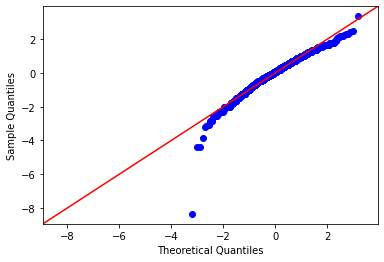

In [1002]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

## Model 2 -  Remove Disto

In [1010]:
continuous = ['productionbudget', 'maxtheaters', 'inf_dombox','runtime_min','act_infl']
categoricals = ['genre', 'source', 'prodmethod', 'creativetype']

In [1014]:
movies_cont = merged_df[continuous]

# log features
log_names = [f'{column}_log' for column in movies_cont.columns]

movies_log = np.log(movies_cont)
movies_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

movies_log_norm = movies_log.apply(normalize)

# one hot encode categoricals
movies_ohe = pd.get_dummies(merged_df[categoricals], prefix=categoricals, drop_first=True)
preprocessed2 = pd.concat([movies_log_norm,merged_df['franchise'] ,movies_ohe], axis=1)

In [1015]:

outcome = 'inf_dombox_log'
predictor_variables = "+".join(preprocessed2.columns)
formula = outcome + '~' + predictor_variables
print(predictor_variables)
print(formula)

productionbudget_log+maxtheaters_log+inf_dombox_log+runtime_min_log+act_infl_log+franchise+genre_Adventure+genre_Black_Comedy+genre_Comedy+genre_ConcertPerformance+genre_Documentary+genre_Drama+genre_Horror+genre_Musical+genre_Romantic_Comedy+genre_ThrillerSuspense+genre_Western+source_Based_on_Factual_BookArticle+source_Based_on_Fiction_BookShort_Story+source_Based_on_Folk_TaleLegendFairytale+source_Based_on_Game+source_Based_on_Movie+source_Based_on_Musical_Group+source_Based_on_Musical_or_Opera+source_Based_on_Play+source_Based_on_Real_Life_Events+source_Based_on_Religious_Text+source_Based_on_Short_Film+source_Based_on_Song+source_Based_on_TV+source_Based_on_Theme_Park_Ride+source_Based_on_Toy+source_Compilation+source_Original_Screenplay+source_Remake+source_Spin_Off+prodmethod_Digital_Animation+prodmethod_Hand_Animation+prodmethod_Live_Action+prodmethod_Multiple_Production_Methods+prodmethod_Stop_Motion_Animation+creativetype_Digital_Animation+creativetype_Hand_Animation+creative

In [1016]:
model2 = ols(formula = formula, data = preprocessed2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inf_dombox_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.125e+31
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:45:55   Log-Likelihood:                 49054.
No. Observations:                1508   AIC:                        -9.803e+04
Df Residuals:                    1467   BIC:                        -9.781e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -7.459e-17   2.99e-16     -0.249      0.803   -6.62e-16    5.13e-16
productionbudget_log                     -2.914e-16   8.02e-17     -3.632      0.000   -4.49e-16   -1.34e-16
maxtheaters_log                          -1.527e-16   1.04e-16     -1.471      0.141   -3.56e-16    5.09e-17
inf_dombox_log                               1.0000   1.11e-16   8.98e+15      0.000       1.000       1.000
runtime_min_log                            -1.7e-16   6.04e-17     -2.813      0.005   -2.89e-16   -5.15e-17
act_infl_log                             -1.141e-16   5.15e-17     -2.215      0.027   -2.15e-16   -1.31e-17
franchise                                 5.239e-16   1.46e-16      3.585      0.000    2.37e-16    8.11e-16
genre_Adventure                           4.372e-16   2.27e-16      1.922      0.055   -9.09e-18    8.83e-16
genre_Black_Comedy                       -9.437e-16   3.65e-16     -2.588      0.010   -1.66e-15   -2.28e-16
genre_Comedy                              -7.98e-17      2e-16     -0.399      0.690   -4.72e-16    3.12e-16
genre_ConcertPerformance                  2.762e-15   9.44e-16      2.924      0.004    9.09e-16    4.61e-15
genre_Documentary                        -7.772e-16   9.62e-16     -0.808      0.419   -2.66e-15    1.11e-15
genre_Drama                               4.684e-16   1.94e-16      2.420      0.016    8.88e-17    8.48e-16
genre_Horror                             -1.804e-16   2.35e-16     -0.767      0.443   -6.42e-16    2.81e-16
genre_Musical                             1.193e-15   4.63e-16      2.575      0.010    2.84e-16     2.1e-15
genre_Romantic_Comedy                     1.013e-15   3.03e-16      3.347      0.001    4.19e-16    1.61e-15
genre_ThrillerSuspense                    1.093e-16   1.99e-16      0.548      0.584   -2.82e-16       5e-16
genre_Western                            -6.384e-16   4.71e-16     -1.356      0.175   -1.56e-15    2.85e-16
source_Based_on_Factual_BookArticle       3.331e-16   3.18e-16      1.047      0.295   -2.91e-16    9.57e-16
source_Based_on_Fiction_BookShort_Story   -2.29e-16   2.57e-16     -0.892      0.373   -7.33e-16    2.75e-16
source_Based_on_Folk_TaleLegendFairytale  3.469e-17   4.66e-16      0.074      0.941    -8.8e-16    9.49e-16
source_Based_on_Game                      7.633e-17   5.07e-16      0.150      0.880   -9.19e-16    1.07e-15
source_Based_on_Movie                    -1.041e-16   6.29e-16     -0.166      0.869   -1.34e-15    1.13e-15
source_Based_on_Musical_Group            -3.331e-15   2.07e-15     -1.612      0.107   -7.38e-15    7.22e-16
source_Based_on_Musical_or_Opera         -1.665e-15   1.04e-15     -1.597      0.111   -3.71e-15     3.8e-16
source_Based_on_Play           

Conclusions from model 2:

1. genre_Documentary,genre_Comedy,genre_Horror,genre_ThrillerSuspense,genre_Western,source_Based_on_Factual_BookArticle,    source_Based_on_Song,source_Based_on_Theme_Park_Ride,source_Based_on_Toy,
source_Compilation,source_Original_Screenplay,source_Remake,source_Spin_Off,prodmethod_Digital_Animation,
prodmethod_Hand_Animation,creativetype_Live_Action,creativetype_Multiple_Production_Methods,creativetype_Stop_Motion_Animation
no longerrelevant feature. Will need to drop it in the next model


In [1017]:
X = preprocessed2.drop(columns='inf_dombox_log',axis=1)
y = preprocessed2['inf_dombox_log']

### Perform a train-test split

In [1018]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1131 377 1131 377


### Apply model to train set

In [1019]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
model2linreg = LinearRegression()
# Fit the model to train data
model2linreg.fit(X_train, y_train)

LinearRegression()

### Calculate predictions on training and test sets

In [1020]:
# Calculate predictions on training and test sets
y_hat_train = model2linreg.predict(X_train)
y_pred = model2linreg.predict(X_test)

In [1021]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_pred - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [1024]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.17329494155248945
Test Mean Squarred Error: 0.2060230345661356


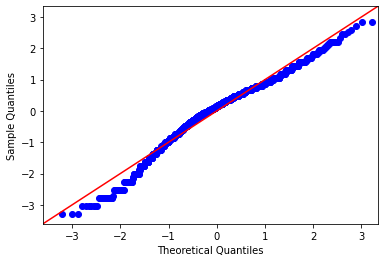

In [1026]:
fig2 = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

## Model 3 -  Remove Prodbudget and other cols

In [1028]:
continuous = ['maxtheaters', 'inf_dombox','runtime_min','act_infl']
categoricals = ['genre', 'source', 'prodmethod', 'creativetype']

In [1047]:
movies_cont = merged_df[continuous]

# log features
log_names = [f'{column}_log' for column in movies_cont.columns]

movies_log = np.log(movies_cont)
movies_log.columns = log_names

movies_log_norm = movies_log.apply(normalize)

# one hot encode categoricals
movies_ohe = pd.get_dummies(merged_df[categoricals], prefix=categoricals, drop_first=True)
movies_ohe.drop(columns=['genre_Documentary','genre_Comedy','genre_Horror','genre_ThrillerSuspense'
                         ,'genre_Western','source_Based_on_Factual_BookArticle',
                         'source_Based_on_Song','source_Based_on_Theme_Park_Ride','source_Based_on_Toy',
'source_Compilation','source_Original_Screenplay','source_Remake','source_Spin_Off','prodmethod_Digital_Animation',
'prodmethod_Hand_Animation','creativetype_Live_Action','creativetype_Multiple_Production_Methods',
                         'creativetype_Stop_Motion_Animation','genre_Black_Comedy','genre_ConcertPerformance',
                        'genre_Musical','source_Based_on_Folk_TaleLegendFairytale','source_Based_on_Game',
'source_Based_on_Movie',
'source_Based_on_Musical_Group',
'source_Based_on_Musical_or_Opera',
'source_Based_on_Play',
'source_Based_on_Real_Life_Events',
'source_Based_on_Religious_Text',
'source_Based_on_Short_Film',
'source_Based_on_TV','prodmethod_Multiple_Production_Methods',
'prodmethod_Stop_Motion_Animation',
'creativetype_Hand_Animation',], inplace=True)
preprocessed3 = pd.concat([movies_log_norm,merged_df['franchise'] ,movies_ohe], axis=1)





In [1048]:

outcome = 'inf_dombox_log'
predictor_variables = "+".join(preprocessed3.columns)
formula = outcome + '~' + predictor_variables


In [1049]:
model3 =ols(formula = formula, data = preprocessed3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inf_dombox_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.897e+31
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:10:26   Log-Likelihood:                 49535.
No. Observations:                1508   AIC:                        -9.905e+04
Df Residuals:                    1496   BIC:                        -9.898e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 1.37e-16   1.62e-16      0.843      0.399   -1.82e-16    4.56e-16
maxtheaters_log                           4.51e-16   7.17e-17      6.295      0.000     3.1e-16    5.92e-16
inf_dombox_log                              1.0000   7.73e-17   1.29e+16      0.000       1.000       1.000
runtime_min_log                          8.032e-16   3.98e-17     20.178      0.000    7.25e-16    8.81e-16
act_infl_log                             3.799e-16   3.63e-17     10.454      0.000    3.09e-16    4.51e-16
franchise                               -2.463e-16   1.01e-16     -2.448      0.014   -4.44e-16   -4.89e-17
genre_Adventure                         -9.298e-16   1.39e-16     -6.668      0.000    -1.2e-15   -6.56e-16
genre_Drama                              5.794e-16   8.66e-17      6.689      0.000    4.09e-16    7.49e-16
genre_Romantic_Comedy                            0   1.93e-16          0      1.000   -3.78e-16    3.78e-16
source_Based_on_Fiction_BookShort_Story  3.712e-16    9.2e-17      4.037      0.000    1.91e-16    5.52e-16
prodmethod_Live_Action                  -6.939e-17   1.59e-16     -0.437      0.662   -3.81e-16    2.42e-16
creativetype_Digital_Animation            1.18e-16   1.95e-16      0.605      0.545   -2.65e-16    5.01e-16
==============================================================================
Omnibus:                       55.732   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.864
Skew:                           0.448   Prob(JB):                     2.24e-14
Kurtosis:                       3.443   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusions from model 2:

1. genre_Documentary,genre_Comedy,genre_Horror,genre_ThrillerSuspense,genre_Western,source_Based_on_Factual_BookArticle,    source_Based_on_Song,source_Based_on_Theme_Park_Ride,source_Based_on_Toy,
source_Compilation,source_Original_Screenplay,source_Remake,source_Spin_Off,prodmethod_Digital_Animation,
prodmethod_Hand_Animation,creativetype_Live_Action,creativetype_Multiple_Production_Methods,creativetype_Stop_Motion_Animation
no longerrelevant feature. Will need to drop it in the next model


In [1050]:
X = preprocessed3.drop(columns='inf_dombox_log',axis=1)
y = preprocessed3['inf_dombox_log']

### Perform a train-test split

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1131 377 1131 377


### Apply model to train set

In [1037]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
model3linreg = LinearRegression()
# Fit the model to train data
model3linreg.fit(X_train, y_train)

LinearRegression()

### Calculate predictions on training and test sets

In [1041]:
# Calculate predictions on training and test sets
y_hat_train = model3linreg.predict(X_train)
y_pred = model3linreg.predict(X_test)

In [1042]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_pred - y_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [1043]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.17329494155248945
Test Mean Squarred Error: 0.2060230345661356


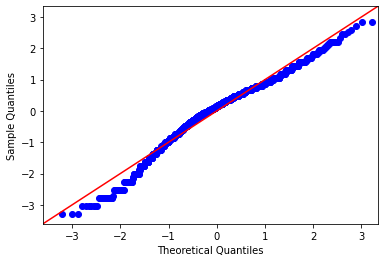

In [1026]:
fig2 = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

## Regress for inference on M Q and P for Bass Model

In [1057]:
bass_df = pd.read_csv('./data/bass_model_values.csv', encoding='utf-8',index_col=0)

In [1064]:
bass_df.describe()

,year,M,p,q
count,2381.000000,2.381000e+03,2381.000000,2381.000000
mean,2014.338933,5.163880e+06,0.116816,0.253071
std,3.111208,1.174091e+07,1.049731,0.721073
min,2009.000000,1.731849e+02,-27.190591,-4.968029
25%,2011.000000,2.996146e+04,0.067116,0.000023
50%,2014.000000,4.076424e+05,0.158372,0.140461
75%,2017.000000,5.989178e+06,0.395063,0.424750
max,2021.000000,2.849854e+08,11.955771,21.027340


In [1063]:
bass_merged_df = merged_df.merge(bass_df,left_on='title', right_on='title')

In [1062]:
bass_merged_df.describe()

,tconst,title,released,distributor,genre,source,prodmethod,creativetype,productionbudget,maxtheaters,...,inf_dombox,year_x,franchise,runtime_min,act_infl,dir_infl,year_y,M,p,q
0,tt1606378,A Good Day to Die Hard,"Feb 14, 2013",20th_Century_Fox,Action,Original_Screenplay,Live_Action,Live_Action,92000000,3555,...,75881751,2013,1,98,1.622326e+08,3.029308e+06,2013,8.176613e+06,0.267647,0.660205
1,tt2935510,Ad Astra,"Sep 20, 2019",20th_Century_Fox,ThrillerSuspense,Original_Screenplay,Live_Action,Live_Action,80000000,3460,...,50188370,2019,0,123,2.257948e+09,4.875923e+06,2019,5.463108e+06,0.508063,0.077618
2,tt2316204,Alien: Covenant,"May 19, 2017",20th_Century_Fox,Horror,Original_Screenplay,Live_Action,Live_Action,97000000,3772,...,75835026,2017,1,122,2.301957e+08,6.396533e+07,2017,8.259052e+06,0.632185,-0.055396
3,tt0437086,Alita: Battle Angel,"Feb 14, 2019",20th_Century_Fox,Action,Based_on_ComicGraphic_Novel,AnimationLive_Action,AnimationLive_Action,170000000,3802,...,85838210,2019,0,122,7.990851e+08,5.905082e+06,2019,9.238700e+06,0.252952,0.518043
4,tt1727824,Bohemian Rhapsody,"Nov 2, 2018",20th_Century_Fox,Drama,Based_on_Real_Life_Events,Live_Action,Live_Action,55000000,4000,...,217345118,2018,0,134,6.591602e+04,7.480995e+07,2018,2.367270e+07,0.326295,-0.157782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,tt5362988,Wind River,"Aug 4, 2017",Weinstein_Co,ThrillerSuspense,Original_Screenplay,Live_Action,Live_Action,11000000,2890,...,34516822,2017,0,107,4.507963e+08,1.000000e-02,2017,3.728025e+06,0.059571,0.804957
811,tt2404425,Woman in Gold,"Apr 1, 2015",Weinstein_Co,Drama,Original_Screenplay,Live_Action,Live_Action,11000000,2011,...,36192094,2015,0,109,2.190229e+08,2.080154e+06,2015,3.885660e+06,0.101435,0.433702
812,tt0464154,Piranha 3D,"Aug 20, 2010",WeinsteinDimension,Horror,Remake,Live_Action,Live_Action,24000000,2491,...,29027738,2010,0,88,2.397599e+07,7.838763e+05,2010,3.172514e+06,0.555840,0.057390
813,tt1262416,Scream 4,"Apr 15, 2011",WeinsteinDimension,Horror,Original_Screenplay,Live_Action,Live_Action,40000000,3314,...,44103064,2011,0,111,3.070934e+07,5.564623e+05,2011,4.792566e+06,0.632045,0.035520


In [ ]:
**Regress for M**

In [ ]:
**Regress for P**

In [ ]:
**Regress for Q**

## Random Forest

In [1066]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [1071]:
X = preprocessed.drop(columns='inf_dombox_log',axis=1)
y = preprocessed['inf_dombox_log']

In [1072]:
# Split the data into training and test sets. Use the default split size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1131 377 1131 377


### Decision tree Baseline

In [1073]:
#Baseline a Decision Tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Feature Importances

In [ ]:
# Feature importance
tree_clf.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [ ]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

In [ ]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

### Random Forest

In [ ]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Training accuracy score
forest.score(data_train, target_train)

In [ ]:
# Test accuracy score
forest.score(data_test, target_test)

In [ ]:
plot_feature_importances(forest)